In [19]:


import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

from keras.datasets import cifar10
from keras import layers
from keras.models import Model


2.17.1


# Exercise 1

Data Preprocessing and Data Normalization

x_train shape: (48000, 32, 32, 3)
y_train shape: (48000, 1)
x_val shape: (6000, 32, 32, 3)
y_val shape: (6000, 1)
x_test shape: (6000, 32, 32, 3)
y_test shape: (6000, 1)


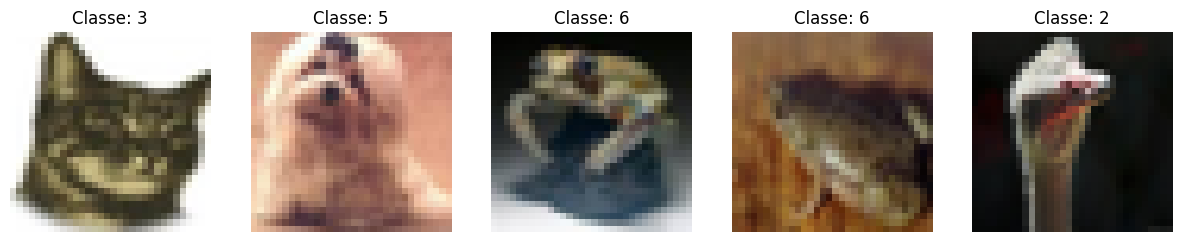

In [20]:


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Data Splitting
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)

x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


#Data Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

num_images = 5
plt.figure(figsize=(15, 3))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'Classe: {y_train[i][0]}')
    plt.axis('off')

plt.show()



Network Definition

In [21]:

input = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(8, (3, 3), strides=1, activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(12, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(16, (3, 3), strides=1, activation="relu", padding="same")(x)

# Decoder
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2DTranspose(12, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2DTranspose(3, (3, 3), activation="relu", padding="same")(x)

autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="mean_squared_error")
autoencoder.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 32, 32, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 16, 16, 12)          │             876 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 8, 8, 12)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 8, 8, 16)            │           1,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_40 (UpSampling2D)      │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_52                  │ (None, 16, 16, 12)          │           1,740 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_41 (UpSampling2D)      │ (None, 32, 32, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_53                  │ (None, 32, 32, 3)           │             327 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,911 (19.18 KB)

 Trainable params: 4,911 (19.18 KB)

 Non-trainable params: 0 (0.00 B)

Training

In [22]:
history = autoencoder.fit(
    x=x_train,
    y=x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_val, x_val)
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0596 - val_loss: 711.2676
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0090 - val_loss: 661.2609
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0074 - val_loss: 769.7068
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0066 - val_loss: 897.9927
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0062 - val_loss: 1143.6550
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0059 - val_loss: 1378.2026
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0056 - val_loss: 1632.2035
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0054 - val_loss: 1839.1688
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0052 - val_loss: 2117.9998
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0051 - val_loss: 2423.2297
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0049 - val_loss: 2608.9578
Epoch 12/20
375/375 ━━━

Training Losses: [0.02630980871617794, 0.008536901324987411, 0.007169349119067192, 0.006509001366794109, 0.006103445775806904, 0.005796557758003473, 0.005572396796196699, 0.005381325259804726, 0.005171956494450569, 0.005025028716772795, 0.004911692813038826, 0.004799386952072382, 0.004723683465272188, 0.00463946582749486, 0.004566641990095377, 0.004505542106926441, 0.004439817741513252, 0.004387551918625832, 0.00434462632983923, 0.004292177967727184]
Validation Losses: [711.267578125, 661.2609252929688, 769.7068481445312, 897.9927368164062, 1143.655029296875, 1378.20263671875, 1632.2034912109375, 1839.1688232421875, 2117.999755859375, 2423.229736328125, 2608.957763671875, 2936.37841796875, 3190.4140625, 3353.056884765625, 3765.59326171875, 3744.520751953125, 4222.3603515625, 4239.8837890625, 4811.24560546875, 4694.63525390625]


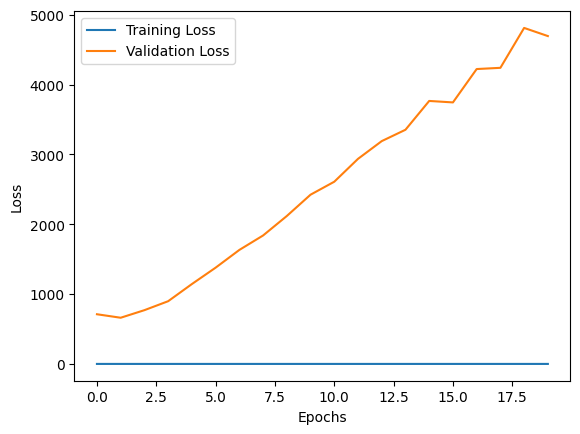

In [23]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print("Training Losses:", train_loss)
print("Validation Losses:", val_loss)

plt.plot(history.epoch, train_loss, label='Training Loss')
plt.plot(history.epoch, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


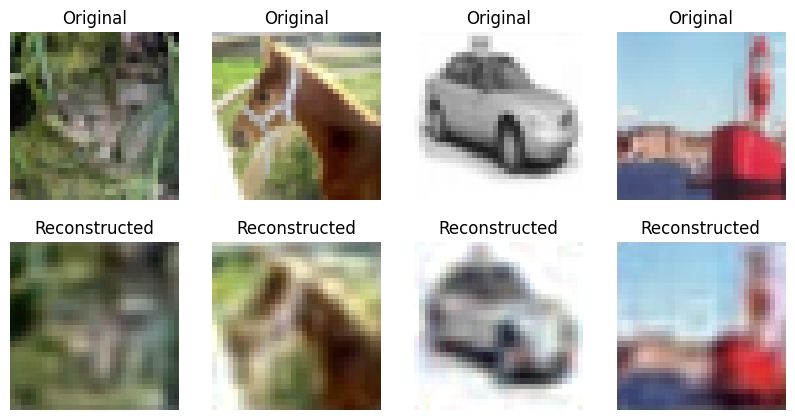

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
import matplotlib.pyplot as plt

def display_images(original_images, reconstructed_images, n=4):

    plt.figure(figsize=(10, 5))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        ax.imshow(original_images[i])
        ax.axis('off')
        ax.set_title('Original')
        ax = plt.subplot(2, n, i + 1 + n)
        ax.imshow(reconstructed_images[i])
        ax.axis('off')
        ax.set_title('Reconstructed')

    plt.show()

predictions = autoencoder.predict(x_test)

display_images(x_test, predictions, n=4)


predictions = autoencoder.predict(x_test)


# Exercise 2

In [25]:
!pip install optuna

import optuna
from keras import layers, Model
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_param_importances
from tensorflow.keras.datasets import cifar10

(x_train, _), (x_val, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

def objective(trial):
    num_layers = trial.suggest_int("num_layers", 2, 4)
    base_filters = trial.suggest_categorical("base_filters", [8, 16, 32])
    kernel_size = trial.suggest_categorical("kernel_size", [(3, 3), (5, 5)])
    latent_compression = trial.suggest_float("latent_compression", 0.25, 0.5)

    input_layer = layers.Input(shape=(32, 32, 3))
    x = input_layer
    filters = base_filters

    for _ in range(num_layers):
        x = layers.Conv2D(filters, kernel_size, activation="relu", padding="same")(x)
        x = layers.MaxPooling2D((2, 2), padding="same")(x)
        filters *= 2

    x = layers.Conv2D(int(filters * latent_compression), kernel_size, activation="relu", padding="same")(x)

    for _ in range(num_layers):
        filters //= 2
        x = layers.UpSampling2D((2, 2))(x)
        x = layers.Conv2DTranspose(filters, kernel_size, activation="relu", padding="same")(x)

    output_layer = layers.Conv2DTranspose(3, (3, 3), activation="sigmoid", padding="same")(x)

    model = Model(input_layer, output_layer)
    model.compile(optimizer="adam", loss="mean_squared_error")

    history = model.fit(
        x_train,
        x_train,
        validation_data=(x_val, x_val),
        epochs=10,
        batch_size=128,
        verbose=0
    )

    val_loss = history.history["val_loss"][-1]

    return val_loss

def logging_callback(study, trial):
    print(f"Trial {trial.number}: Value = {trial.value}, Params = {trial.params}")

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10, callbacks=[logging_callback])

plot_optimization_history(study)

plot_parallel_coordinate(study)
plot_param_importances(study)



[I 2024-11-17 16:41:26,077] A new study created in memory with name: no-name-7a5f92e9-6fb5-4b70-aad4-5f1fa7fab8d6
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 3) which is of type tuple.

/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 5) which is of type tuple.

[I 2024-11-17 16:43:04,532] Trial 0 finished with value: 0.004196604713797569 and parameters: {'num_layers': 3, 'base_filters': 32, 'kernel_size': (3, 3), 'latent_compression': 0.4264892460125874}. Best is trial 0 with value: 0.004196604713797569.


Trial 0: Value = 0.004196604713797569, Params = {'num_layers': 3, 'base_filters': 32, 'kernel_size': (3, 3), 'latent_compression': 0.4264892460125874}


[I 2024-11-17 16:44:47,722] Trial 1 finished with value: 0.009363898076117039 and parameters: {'num_layers': 4, 'base_filters': 16, 'kernel_size': (5, 5), 'latent_compression': 0.3170273216467703}. Best is trial 0 with value: 0.004196604713797569.


Trial 1: Value = 0.009363898076117039, Params = {'num_layers': 4, 'base_filters': 16, 'kernel_size': (5, 5), 'latent_compression': 0.3170273216467703}


[I 2024-11-17 16:46:21,145] Trial 2 finished with value: 0.004429902881383896 and parameters: {'num_layers': 3, 'base_filters': 32, 'kernel_size': (3, 3), 'latent_compression': 0.34432063614441344}. Best is trial 0 with value: 0.004196604713797569.


Trial 2: Value = 0.004429902881383896, Params = {'num_layers': 3, 'base_filters': 32, 'kernel_size': (3, 3), 'latent_compression': 0.34432063614441344}


[I 2024-11-17 16:46:56,966] Trial 3 finished with value: 0.00487069645896554 and parameters: {'num_layers': 2, 'base_filters': 8, 'kernel_size': (3, 3), 'latent_compression': 0.4825294288330373}. Best is trial 0 with value: 0.004196604713797569.


Trial 3: Value = 0.00487069645896554, Params = {'num_layers': 2, 'base_filters': 8, 'kernel_size': (3, 3), 'latent_compression': 0.4825294288330373}


[I 2024-11-17 16:47:50,572] Trial 4 finished with value: 0.005050221923738718 and parameters: {'num_layers': 2, 'base_filters': 8, 'kernel_size': (5, 5), 'latent_compression': 0.4323784555545921}. Best is trial 0 with value: 0.004196604713797569.


Trial 4: Value = 0.005050221923738718, Params = {'num_layers': 2, 'base_filters': 8, 'kernel_size': (5, 5), 'latent_compression': 0.4323784555545921}


[I 2024-11-17 16:49:19,588] Trial 5 finished with value: 0.004487869795411825 and parameters: {'num_layers': 3, 'base_filters': 32, 'kernel_size': (3, 3), 'latent_compression': 0.30174147897626624}. Best is trial 0 with value: 0.004196604713797569.


Trial 5: Value = 0.004487869795411825, Params = {'num_layers': 3, 'base_filters': 32, 'kernel_size': (3, 3), 'latent_compression': 0.30174147897626624}


[I 2024-11-17 16:51:02,920] Trial 6 finished with value: 0.007103005424141884 and parameters: {'num_layers': 4, 'base_filters': 32, 'kernel_size': (3, 3), 'latent_compression': 0.32000112595426655}. Best is trial 0 with value: 0.004196604713797569.


Trial 6: Value = 0.007103005424141884, Params = {'num_layers': 4, 'base_filters': 32, 'kernel_size': (3, 3), 'latent_compression': 0.32000112595426655}


[I 2024-11-17 16:53:30,683] Trial 7 finished with value: 0.004029178060591221 and parameters: {'num_layers': 3, 'base_filters': 32, 'kernel_size': (5, 5), 'latent_compression': 0.34940608247647226}. Best is trial 7 with value: 0.004029178060591221.


Trial 7: Value = 0.004029178060591221, Params = {'num_layers': 3, 'base_filters': 32, 'kernel_size': (5, 5), 'latent_compression': 0.34940608247647226}


[I 2024-11-17 16:55:06,472] Trial 8 finished with value: 0.006928146351128817 and parameters: {'num_layers': 4, 'base_filters': 32, 'kernel_size': (3, 3), 'latent_compression': 0.4090067137970147}. Best is trial 7 with value: 0.004029178060591221.


Trial 8: Value = 0.006928146351128817, Params = {'num_layers': 4, 'base_filters': 32, 'kernel_size': (3, 3), 'latent_compression': 0.4090067137970147}


[I 2024-11-17 16:56:22,976] Trial 9 finished with value: 0.0021938439458608627 and parameters: {'num_layers': 2, 'base_filters': 32, 'kernel_size': (3, 3), 'latent_compression': 0.45996356396758054}. Best is trial 9 with value: 0.0021938439458608627.


Trial 9: Value = 0.0021938439458608627, Params = {'num_layers': 2, 'base_filters': 32, 'kernel_size': (3, 3), 'latent_compression': 0.45996356396758054}


In [26]:
best_params = study.best_params
print("Best hyperparameters:", best_params)

num_layers = best_params["num_layers"]
base_filters = best_params["base_filters"]
kernel_size = best_params["kernel_size"]
latent_compression = best_params["latent_compression"]

input_layer = layers.Input(shape=(32, 32, 3))
x = input_layer
filters = base_filters

for _ in range(num_layers):
    x = layers.Conv2D(filters, kernel_size, activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    filters *= 2

x = layers.Conv2D(int(filters * latent_compression), kernel_size, activation="relu", padding="same")(x)

for _ in range(num_layers):
    filters //= 2
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(filters, kernel_size, activation="relu", padding="same")(x)

output_layer = layers.Conv2DTranspose(3, (3, 3), activation="sigmoid", padding="same")(x)

best_model = Model(input_layer, output_layer)
best_model.compile(optimizer="adam", loss="mean_squared_error")

history = best_model.fit(
    x_train,
    x_train,
    validation_data=(x_val, x_val),
    epochs=10,
    batch_size=128,
    verbose=1
)

best_model.save("best_autoencoder_model.h5")

print("Best model saved as 'best_autoencoder_model.h5'")


Best hyperparameters: {'num_layers': 2, 'base_filters': 32, 'kernel_size': (3, 3), 'latent_compression': 0.45996356396758054}
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - loss: 0.0198 - val_loss: 0.0056
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0025 - val_loss: 0.0028


Best model saved as 'best_autoencoder_model.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_98 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_72 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_99 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_73 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_100 (Conv2D)                  │ (None, 8, 8, 58)            │          33,466 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_72 (UpSampling2D)      │ (None, 16, 16, 58)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_94                  │ (None, 16, 16, 64)          │          33,472 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_73 (UpSampling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_95                  │ (None, 32, 32, 32)          │          18,464 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_96                  │ (None, 32, 32, 3)           │             867 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,663 (412.75 KB)

 Trainable params: 105,661 (412.74 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

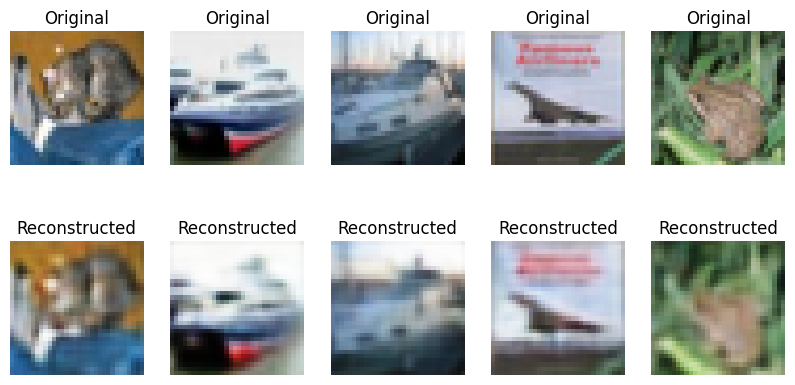

In [27]:
best_model = tf.keras.models.load_model("/content/best_autoencoder_model.h5")
predictions = best_model.predict(x_val[:5])
best_model.summary()
def display_images(original_images, reconstructed_images, n=5):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original_images[i])
        plt.title("Original")
        plt.axis("off")

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed_images[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

display_images(x_val[:5], predictions)



188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0028
Test loss: 0.00283535267226398
Training Loss per epoca: [0.010908377356827259, 0.004932347219437361, 0.004132906906306744, 0.0036831609904766083, 0.003363208379596472, 0.0031275879591703415, 0.002949786139652133, 0.0027146602515131235, 0.002587852068245411, 0.0024593777488917112]
Validation Loss per epoca: [0.005593294743448496, 0.00435924157500267, 0.003708088304847479, 0.003377482993528247, 0.003087203484028578, 0.0029301766771823168, 0.003442805027589202, 0.0034010852687060833, 0.002440002281218767, 0.0028350502252578735]


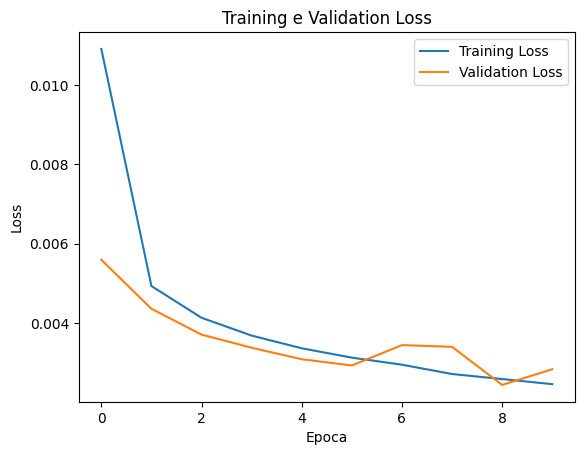

In [28]:

test_loss = best_model.evaluate(x_test, x_test)
print("Test loss:", test_loss)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print("Training Loss per epoca:", train_loss)
print("Validation Loss per epoca:", val_loss)

import matplotlib.pyplot as plt

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.title('Training e Validation Loss')
plt.legend()
plt.show()




# Exercise 3

Images Preprocessing

x_train shape: (48000, 32, 32, 3)
y_train shape: (48000, 1)
x_val shape: (6000, 32, 32, 3)
y_val shape: (6000, 1)
x_test shape: (6000, 32, 32, 3)
y_test shape: (6000, 1)


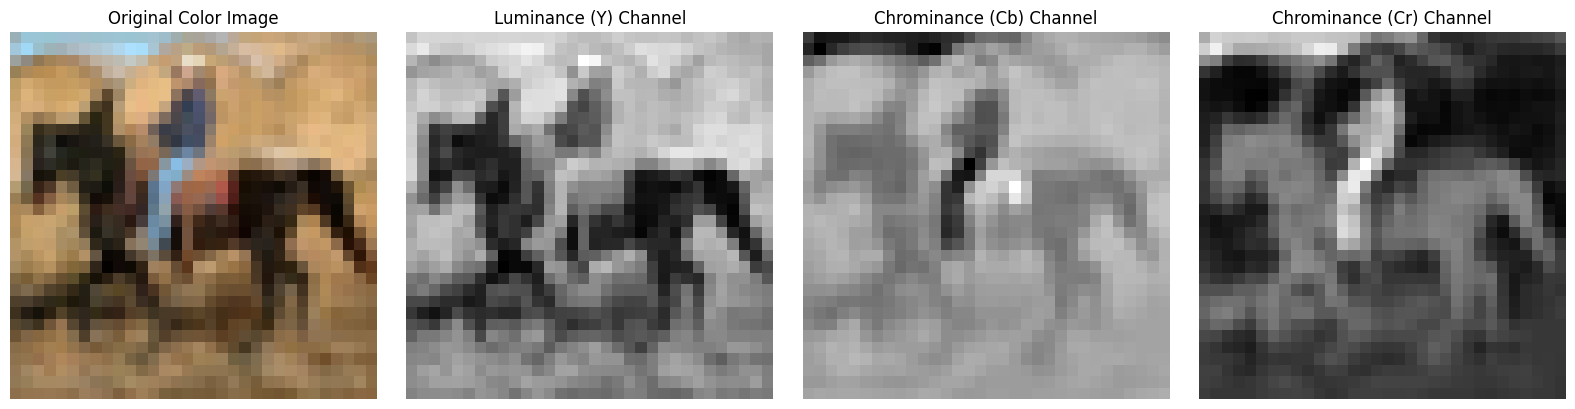

In [29]:
import numpy as np
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import matplotlib.pyplot as plt  # Assicurati che Matplotlib sia importato


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)

x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


def rgb_to_ycbcr(rgb_image):
    ycbcr_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2YCrCb)
    y, cb, cr = cv2.split(ycbcr_image)
    return y, cb, cr

x_train_y, x_train_cb, x_train_cr = [], [], []
x_test_y, x_test_cb, x_test_cr = [], [], []
x_val_y, x_val_cb, x_val_cr = [], [], []

for img in x_train:
    y, cb, cr = rgb_to_ycbcr(img)
    x_train_y.append(y)
    x_train_cb.append(cb)
    x_train_cr.append(cr)

for img in x_test:
    y, cb, cr = rgb_to_ycbcr(img)
    x_test_y.append(y)
    x_test_cb.append(cb)
    x_test_cr.append(cr)

for img in x_val:
    y, cb, cr = rgb_to_ycbcr(img)
    x_val_y.append(y)
    x_val_cb.append(cb)
    x_val_cr.append(cr)

x_train_y = np.array(x_train_y)
x_train_cb = np.array(x_train_cb)
x_train_cr = np.array(x_train_cr)

x_test_y = np.array(x_test_y)
x_test_cb = np.array(x_test_cb)
x_test_cr = np.array(x_test_cr)

x_val_y = np.array(x_val_y)
x_val_cb = np.array(x_val_cb)
x_val_cr = np.array(x_val_cr)

y_train = np.stack([x_train_cb, x_train_cr], axis=-1)
y_test = np.stack([x_test_cb, x_test_cr], axis=-1)
y_val = np.stack([x_val_cb, x_val_cr], axis=-1)


fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(x_test[4])
axes[0].set_title("Original Color Image")
axes[0].axis("off")

axes[1].imshow(x_test_y[4], cmap='gray')
axes[1].set_title("Luminance (Y) Channel")
axes[1].axis("off")

axes[2].imshow(x_test_cb[4], cmap='gray')
axes[2].set_title("Chrominance (Cb) Channel")
axes[2].axis("off")

axes[3].imshow(x_test_cr[4], cmap='gray')
axes[3].set_title("Chrominance (Cr) Channel")
axes[3].axis("off")

plt.tight_layout()
plt.show()





Network Definition

In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras.optimizers import Adam

num_layers = 3
base_filters = 32
kernel_size = (5, 5)
latent_compression = 0.46716737465661873

input_img = Input(shape=(32, 32, 1))
x = input_img
filters = base_filters


for _ in range(num_layers):
    x = layers.Conv2D(filters, kernel_size, activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    filters *= 2

x = layers.Conv2D(int(filters * latent_compression), kernel_size, activation="relu", padding="same")(x)


for _ in range(num_layers):
    filters //= 2
    x = layers.UpSampling2D(size=(2, 2))(x)
    x = layers.Conv2DTranspose(filters, kernel_size, activation="relu", padding="same")(x)

output_cbcr = layers.Conv2D(2, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, output_cbcr)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()




Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)          │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 32, 32, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_74 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_102 (Conv2D)                  │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_75 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_103 (Conv2D)                  │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_76 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_104 (Conv2D)                  │ (None, 4, 4, 119)           │         380,919 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_74 (UpSampling2D)      │ (None, 8, 8, 119)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_97                  │ (None, 8, 8, 128)           │         380,928 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_75 (UpSampling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_98                  │ (None, 16, 16, 64)          │         204,864 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_76 (UpSampling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_99                  │ (None, 32, 32, 32)          │          51,232 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_105 (Conv2D)                  │ (None, 32, 32, 2)           │             578 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,275,545 (4.87 MB)

 Trainable params: 1,275,545 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

Training

In [31]:
history = autoencoder.fit(
    x_train_y, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(x_val_y, y_val)
)


Epoch 1/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 8/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 9/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 10/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 11/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 12/25
750/750 ━━━━━━━━━━

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


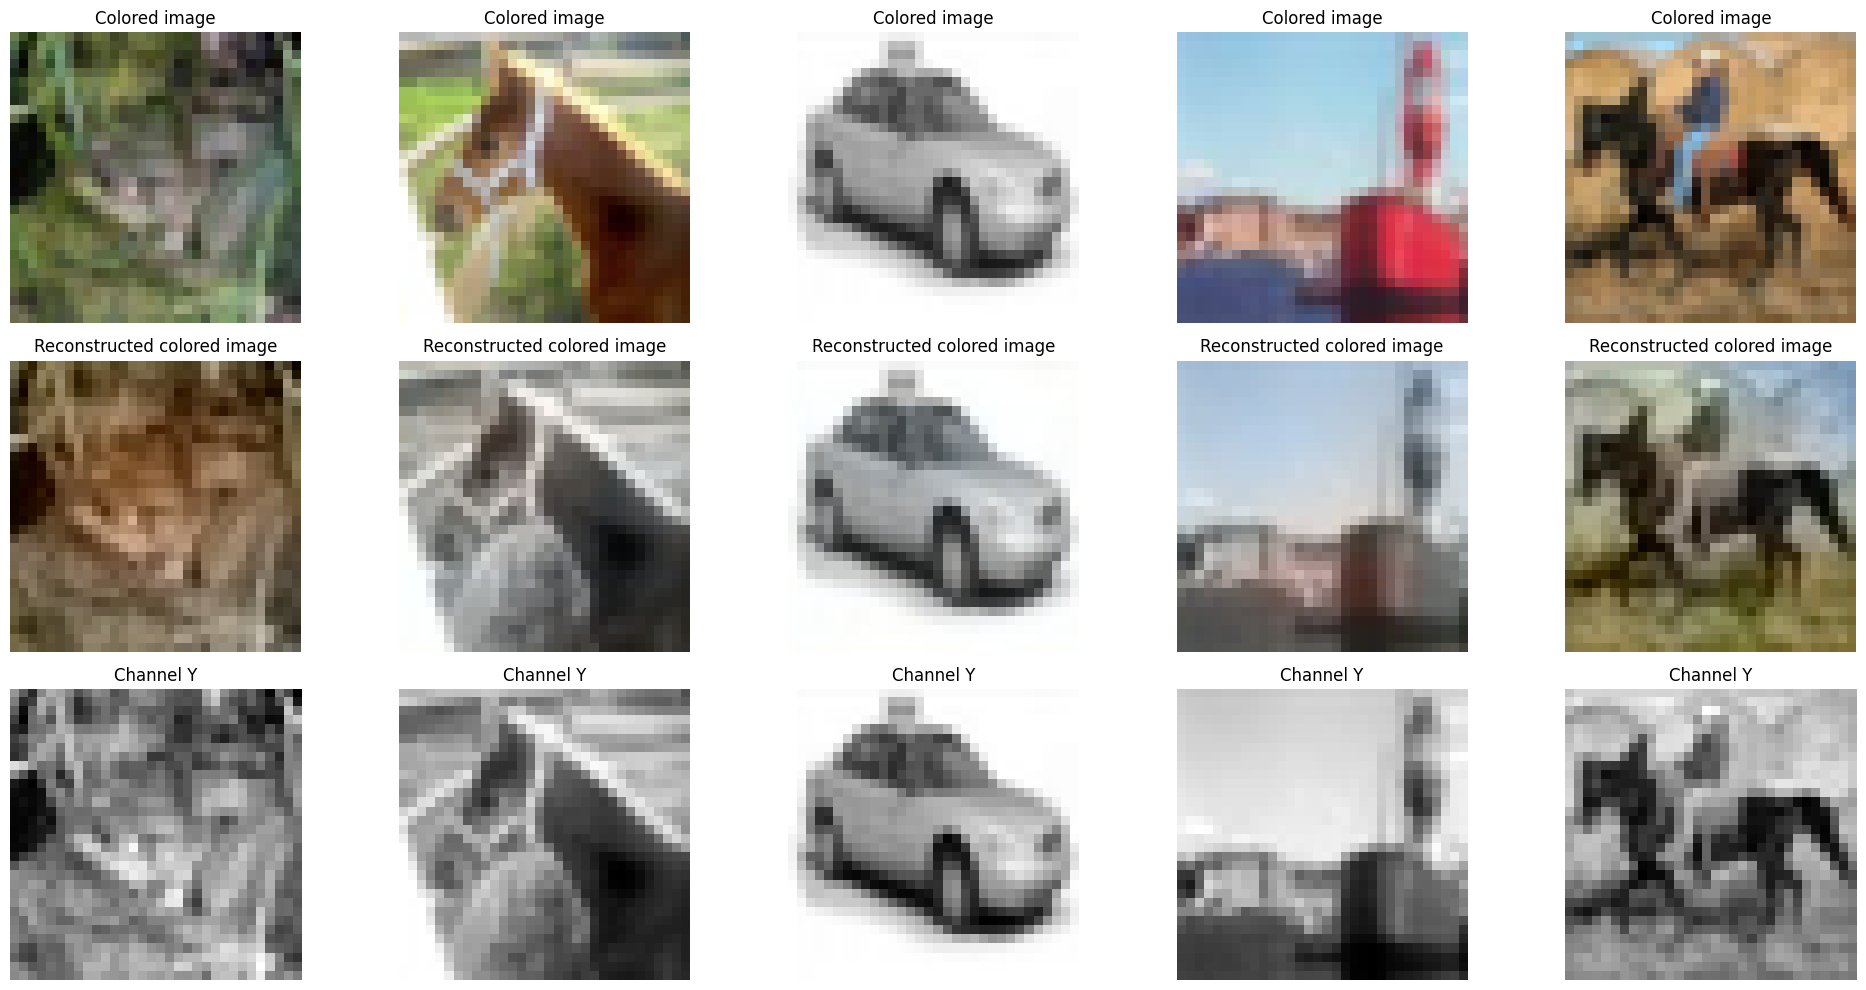

In [32]:
predicted_cbcr = autoencoder.predict(x_test_y)

reconstructed_images = []
for i in range(len(x_test_y)):
    y_channel = x_test_y[i].squeeze()
    cb_channel = predicted_cbcr[i, ..., 0]
    cr_channel = predicted_cbcr[i, ..., 1]

    ycbcr_image = cv2.merge([y_channel, cb_channel, cr_channel])
    rgb_image = cv2.cvtColor(ycbcr_image, cv2.COLOR_YCrCb2RGB)
    reconstructed_images.append(rgb_image)


plt.figure(figsize=(20, 10))

for i in range(5):
    # Visualizzazione delle immagini originali con colori
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[i])
    plt.title("Colored image")
    plt.axis('off')

    # Visualizzazione della ricostruzione a colori
    plt.subplot(3, 5, i+6)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstructed colored image")
    plt.axis('off')

    # Visualizzazione del canale Y in bianco e nero
    plt.subplot(3, 5, i+11)
    plt.imshow(x_test_y[i].squeeze(), cmap='gray')
    plt.title("Channel Y")
    plt.axis('off')

plt.tight_layout()
plt.show()




188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028
Test loss: 0.00283535267226398
Training Loss: [0.003135919803753495, 0.003005047794431448, 0.0029536120127886534, 0.0028977706097066402, 0.002844664268195629, 0.002794275525957346, 0.0027713635936379433, 0.0027321698144078255, 0.002691577887162566, 0.00264746998436749, 0.002597144339233637, 0.0025422335602343082, 0.0024845225270837545, 0.0024298024363815784, 0.0023620775900781155, 0.002311980351805687, 0.002249611308798194, 0.0021756088826805353, 0.002104109153151512, 0.0020440109074115753, 0.0019854761194437742, 0.001926060183905065, 0.0018679725471884012, 0.0018187761306762695, 0.0017635863041505218]
Validation Loss: [0.0029343473725020885, 0.0029104924760758877, 0.0028315200470387936, 0.0028303477447479963, 0.0029040477238595486, 0.002836341969668865, 0.002785934368148446, 0.0027805969584733248, 0.0027552677784115076, 0.0027726541738957167, 0.0028229274321347475, 0.002821817761287093, 0.0028270245529711246, 0.002958947094157338

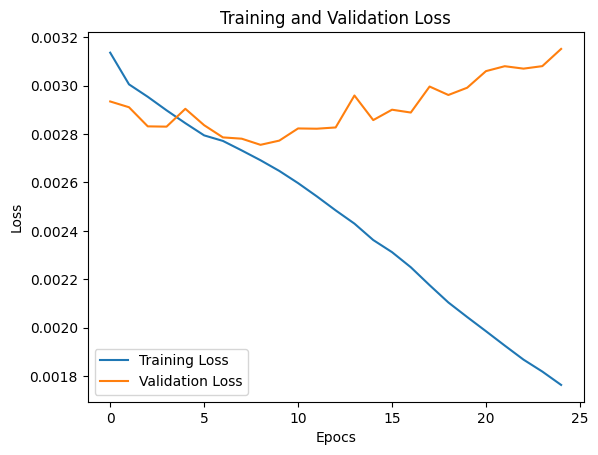

In [33]:
test_loss = best_model.evaluate(x_test, x_test)
print("Test loss:", test_loss)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)

import matplotlib.pyplot as plt

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epocs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()